In [79]:
from py_neuromodulation import nm_RMAP, nm_IO
import numpy as np
from py_neuromodulation import nm_plots
import matplotlib.pyplot as plt

In [78]:
(
    RUN_NAME,
    PATH_RUN,
    PATH_BIDS,
    PATH_OUT,
    datatype,
) = nm_IO.get_paths_example_data()

(
    raw,
    data,
    sfreq,
    line_noise,
    coord_list,
    coord_names,
) = nm_IO.read_BIDS_data(
    PATH_RUN=PATH_RUN, BIDS_PATH=PATH_BIDS, datatype=datatype
)

Extracting parameters from C:\code\py_neuromodulation\py_neuromodulation\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-gripforce_run-0_ieeg.vhdr...
Setting channel info structure...
Reading channel info from C:\code\py_neuromodulation\py_neuromodulation\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-gripforce_run-0_channels.tsv.
Reading electrode coords from C:\code\py_neuromodulation\py_neuromodulation\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_space-mni_electrodes.tsv.


C:\code\py_neuromodulation\py_neuromodulation\nm_IO.py:68: RuntimeWarning: Did not find any events.tsv associated with sub-testsub_ses-EphysMedOff_task-gripforce_run-0.

The search_str was "C:\code\py_neuromodulation\py_neuromodulation\data\sub-testsub\**\ieeg\sub-testsub_ses-EphysMedOff*events.tsv"
  raw_arr = read_raw_bids(bids_path)
C:\code\py_neuromodulation\py_neuromodulation\nm_IO.py:68: RuntimeWarning: The unit for channel(s) MOV_RIGHT has changed from V to NA.
  raw_arr = read_raw_bids(bids_path)
C:\code\py_neuromodulation\py_neuromodulation\nm_IO.py:68: RuntimeWarning: Other is not an MNE-Python coordinate frame for IEEG data and so will be set to 'unknown'
  raw_arr = read_raw_bids(bids_path)
C:\code\py_neuromodulation\py_neuromodulation\nm_IO.py:68: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['MOV_RIGHT']
  raw_arr = read_raw_bids(bids_path)
C:\code\py_neuromodulation\py_neuromodulation\nm_IO.py:68: RuntimeWarning: Not setting posi

In [41]:
coord_list = np.array(coord_list)*1000  # convert to mm

In [43]:
conn_estimator = nm_RMAP.ConnectivityChannelSelector(whole_brain_connectome=False, func_connectivity=True)

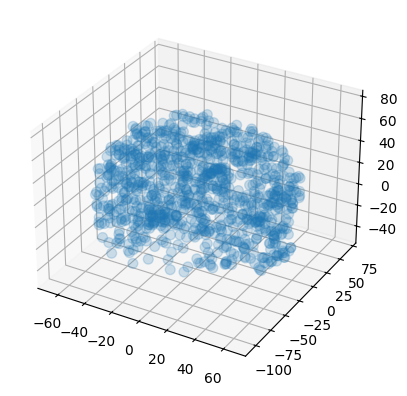

In [44]:
conn_estimator.plot_grid()

In [45]:
coords_grid, grid_idxs = conn_estimator.get_closest_node(coord_list)

In [47]:
conn_estimator.load_connectome(whole_brain_connectome=False, func_connectivity=True)

In [48]:
fps = conn_estimator.get_grid_fingerprints(grid_idxs)

In [49]:
corrs_ = conn_estimator.get_rmap_correlations(fps)

In [52]:
fp_max = fps[np.argmax(corrs_)]

In [71]:
nm_plotter = nm_plots.NM_Plot(ecog_strip=coord_list,)

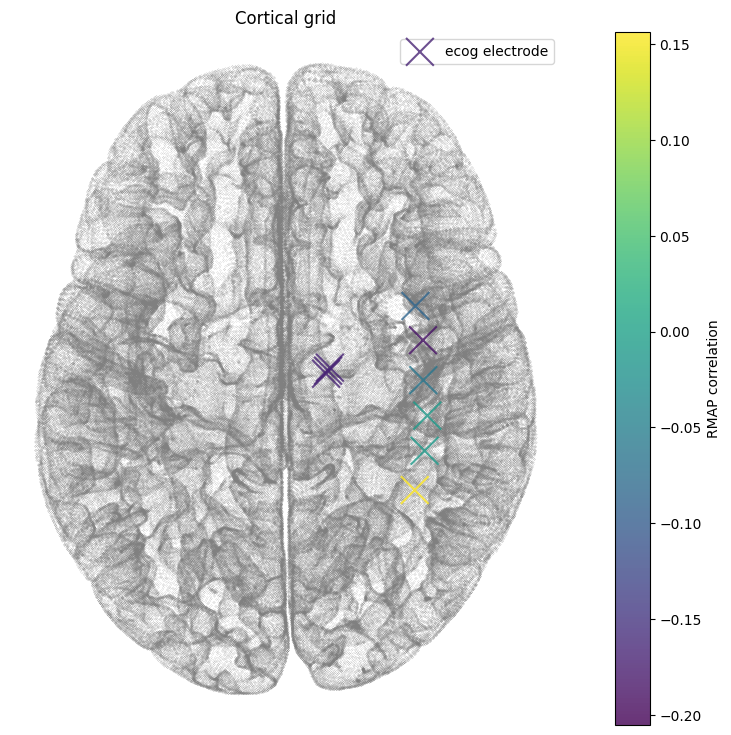

In [76]:
nm_plotter.plot_cortex(strip_color=corrs_, set_clim=True, cbar_label="RMAP correlation", lower_clim=np.max(corrs_), upper_clim=np.min(corrs_))

In [1]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        if i < 2:
            axes[i].imshow(
                slice.T,
                cmap="RdBu",
                origin="lower",
                vmin=-0.1,
                vmax=0.1
            )
        else:
            cbar = plt.colorbar(
                axes[i].imshow(slice.T, cmap="RdBu", origin="lower", vmin=-0.1, vmax=0.1),
                ax=axes[i], shrink=0.5
            )
            cbar.set_label("Correlation")

        axes[i].axis("off")
    
    
slice_0 = fp_max[26, :, :]
slice_1 = fp_max[:, 30, :]
slice_2 = fp_max[:, :, 16]
show_slices([slice_0, slice_1, slice_2])

NameError: name 'fp_max' is not defined